## Forecasting LSTM with SSI at 30.5nm for 1, 2 and 3 Days NEW

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best one. It is being costumized with the purpose to generate results to the work will be submitted to JSWSC.

In [4]:
from library import *
from matplotlib import dates

Using TensorFlow backend.
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib

In [5]:
np.random.seed(7)

In [6]:
# oPath = './output_files/Scaling/SSI/'

In [31]:
# interval='1'
# timeTerm='1 Day'
# interval='2'
# timeTerm='2 Days'
interval='3'
timeTerm='3 Days'

In [32]:
P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_30.5_412dias'+interval+'days.csv'))
T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_30.5_412dias'+interval+'days.csv'))

P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_30.5_301dias'+interval+'days.csv'))
T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_30.5_301dias'+interval+'days.csv'))

P3 = np.asarray(np.loadtxt('./partial_output_files/129D/P_30.5_129dias'+interval+'days.csv'))
T3 = np.asarray(np.loadtxt('./partial_output_files/129D/T_30.5_129dias'+interval+'days.csv'))
Time3 = np.asarray(np.loadtxt('./partial_output_files/129D/Time_30.5_129dias'+interval+'days.csv'))

P4 = np.asarray(np.loadtxt('./partial_output_files/81D/P_30.5_81dias'+interval+'days.csv'))
T4 = np.asarray(np.loadtxt('./partial_output_files/81D/T_30.5_81dias'+interval+'days.csv'))
Time4 = np.asarray(np.loadtxt('./partial_output_files/81D/Time_30.5_81dias'+interval+'days.csv'))

# outputPath = oPath+'30.5_'+timeTerm+'Exp'

In [33]:
P1 = np.transpose(P1)
T1 = T1.reshape(-1,1)

P2 = np.transpose(P2)
T2 = T2.reshape(-1,1)

P3 = np.transpose(P3)
T3 = T3.reshape(-1,1)

P4 = np.transpose(P4)
T4 = T4.reshape(-1,1)

PT = P3
TT = T3

testSet="set3"

Standarizing the data:

In [34]:
# MinMax [0,1] for both IO:
scalerIn = MinMaxScaler(feature_range=(0, 1))
scalerOut = MinMaxScaler(feature_range=(0, 1))
scaling = "O01"

# # MinMax [0,1] for Input and MinMax [-1,1] for Output:
# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = MinMaxScaler(feature_range=(-1, 1))
# scaling = "O-11"

# # MinMax [0,1] for Input and Standard for Output:
# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = StandardScaler()
# scaling = "OStd"

In [35]:
scalerIn.fit(np.concatenate((P1,P2,P4)))
scalerOut.fit(np.concatenate((T1,T2,T4)))

x1 = scalerIn.transform(P1)
x2 = scalerIn.transform(P2)
x3 = scalerIn.transform(P3)
x4 = scalerIn.transform(P4)
xt = scalerIn.transform(PT)

y1 = scalerOut.transform(T1)
y2 = scalerOut.transform(T2)
y3 = scalerOut.transform(T3)
y4 = scalerOut.transform(T4)
yt = scalerOut.transform(TT)

Defining a mask value (an outlier value) to replace the *nan* values of the output vector. (The nets can't deal with *nan* values)

In [36]:
units = 4
epochs = 30
shuffle = True
test_size = 0.2
#loss='mse'
loss = 'mean_squared_error'
afunction = "tanh"
optimizer = 'adam'
# optimizer = 'rmsprop'
dropout = 0.2
lookback = 1

In [37]:
# outputPath = './output_files/Activation/48.5_'

mse = []
testsqtd = 1
error =[]
lstm = []
net = 'gru'
# expName = outputPath + "lstm_"+afunction
# expName = outputPath + "gru_"+afunction
# expName = outputPath + "_gru" + scaling
# expName = outputPath + "_lstm" + scaling
expName = "teste"

# unitsNumbers = range(9, 10)
#unitsNumbers = range(10, 50, 5)
#unitsNumbers = range(25,55,10)
#epochsNumbers = [50, 60, 80, 100, 150, 300]
# batchSizes = [32,64,128,256,512]
lookbacks = range(1,2)
#dropouts = [0.,0.1,0.2,0.40,0.6]
batchRates = [0.01]

for batchRate in batchRates:
    
    p = (np.concatenate((x1,x2,x4)))
    t = (np.concatenate((y1,y2,y4)))
    
    sxTest = xt
    syTest = yt

    sxTrain, sxVal, syTrain, syVal= train_test_split(p, t, test_size=test_size, shuffle=shuffle)

    sxTrain = sxTrain.reshape((sxTrain.shape[0], lookback, sxTrain.shape[1])) 
    sxVal = sxVal.reshape((sxVal.shape[0], lookback, sxVal.shape[1]))
    sxTest = sxTest.reshape((sxTest.shape[0], lookback, sxTest.shape[1])) 

    batch_size = int(sxTrain.shape[0] * batchRate)
    
    for j in range(testsqtd):
        
        print('\n\nTest #'+str(j+1)) # used for units number tests
        
        model = Sequential()
#         model.add(SimpleRNN(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2])))#, return_sequences=True)) # , return_sequences=True
#         model.add(LSTM(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]),activation=afunction))#, return_sequences=True)) # , return_sequences=True
        model.add(GRU(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]),activation=afunction))#, return_sequences=True)) # , return_sequences=True
        model.add(Dense(1))
        model.compile(loss=loss, optimizer=optimizer)

        # checkpoint
        filepath = expName+'.hdf5'
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
        callbacks_list = [checkpoint]
        
        # Fit the model
        f = model.fit(sxTrain, syTrain, epochs=epochs, batch_size=batch_size, validation_data=(sxVal,syVal), callbacks=callbacks_list)

        #Load the best weights
        model.load_weights(filepath)

        #Compile model (required to make predictions)
        model.compile(loss=loss, optimizer=optimizer) #, metrics=['accuracy'])
        
        syTrainP = model.predict(sxTrain)
        syValP = model.predict(sxVal)
        syTestP = model.predict(sxTest)
        
        yTestP = scalerOut.inverse_transform(syTestP)
        yTest = scalerOut.inverse_transform(syTest)

        lstmR2 = r2_score(yTest, yTestP)
        lstmR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
        lstmMSE = mean_squared_error(yTest, yTestP)
        lstmMAPE = mean_absolute_percentage_error(yTest, yTestP)

        error.append([batch_size, np.min(f.history['val_loss'])])
        lstm.append([batch_size, lstmR2, lstmR, lstmMSE, lstmMAPE])
        print('net R2: {:2.2%} Corr: {:2.2%} MSE: {:2.2} MAPE: {:2.2%}'.format(lstmR2, lstmR, lstmMSE, lstmMAPE))
np.savetxt(expName+'.csv',lstm)



Test #1
Train on 630 samples, validate on 158 samples
Epoch 1/30
630/630 [==============================] - 1s 1ms/step - loss: 0.0916 - val_loss: 0.0264
Epoch 2/30
630/630 [==============================] - 0s 358us/step - loss: 0.0263 - val_loss: 0.0235
Epoch 3/30
630/630 [==============================] - 0s 396us/step - loss: 0.0236 - val_loss: 0.0210
Epoch 4/30
630/630 [==============================] - 0s 361us/step - loss: 0.0214 - val_loss: 0.0194
Epoch 5/30
630/630 [==============================] - 0s 389us/step - loss: 0.0203 - val_loss: 0.0184
Epoch 6/30
630/630 [==============================] - 0s 397us/step - loss: 0.0192 - val_loss: 0.0176
Epoch 7/30
630/630 [==============================] - 0s 410us/step - loss: 0.0184 - val_loss: 0.0173
Epoch 8/30
630/630 [==============================] - ETA: 0s - loss: 0.018 - 0s 380us/step - loss: 0.0180 - val_loss: 0.0166
Epoch 9/30
630/630 [==============================] - 0s 387us/step - loss: 0.0175 - val_loss: 0.0163
Epoc

In [38]:
#make predictions
syTrainP = model.predict(sxTrain)
syValP = model.predict(sxVal)   

syTrain = syTrain

yTrain = scalerOut.inverse_transform(syTrain)
yTrainP = scalerOut.inverse_transform(syTrainP)

yVal = scalerOut.inverse_transform(syVal)
yValP = scalerOut.inverse_transform(syValP)


#### Training and Validation Losses Histories

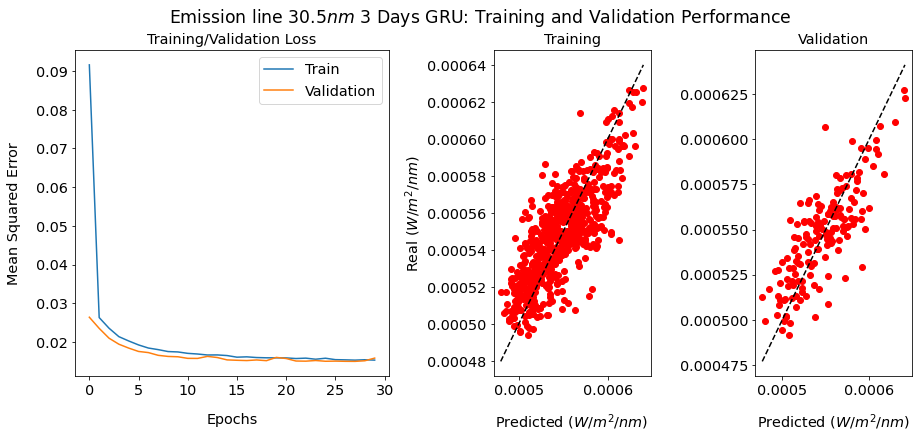

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

plt.subplots_adjust(wspace=0.5)#, hspace=None)
plt.suptitle(r"Emission line $30.5nm$ "+timeTerm+" "+net.upper()+": Training and Validation Performance", fontsize='xx-large')

ax1.plot(f.history['loss'], label='Train')
ax1.plot(f.history['val_loss'], label='Validation')
ax1.set_title('Training/Validation Loss', fontsize='x-large')
ax1.set_xlabel('Epochs', labelpad=15, fontsize='x-large')
ax1.set_ylabel('Mean Squared Error', labelpad=15, fontsize='x-large')
ax1.legend(fontsize='x-large')
ax1.tick_params(axis='x', labelsize='x-large' ) 
ax1.tick_params(axis='y', labelsize='x-large' ) 

ax2.scatter(yTrain,yTrainP, color='red')
ax2.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=15, fontsize='x-large')
ax2.set_ylabel('Real ($W/m^2/nm$)', fontsize='x-large')
ax2.set_title('Training', fontsize='x-large')
#plt.plot([-2,2],[-2,2])
ax2.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
         linestyle='--', label='optimal')
ax2.tick_params(axis='x', labelsize='x-large' ) 
ax2.tick_params(axis='y', labelsize='x-large' ) 

ax3.scatter(yVal,yValP, color='red')
ax3.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=15, fontsize='x-large')
# ax3.set_ylabel('Real ($W/m^2/nm$)', fontsize='xx-large')
# ax3.set_yticks([])
ax3.set_title('Validation', fontsize='x-large')
#plt.plot([-2,2],[-2,2])
ax3.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
         linestyle='--', label='optimal')
ax3.tick_params(axis='x', labelsize='x-large') 
ax3.tick_params(axis='y', labelsize='x-large' ) 

#fig.savefig('./Figures/LSTM Training x Validation 6Hours.png', dpi=600, format='png')
fig.savefig('./Figures/SSI Predictions/30.5_'+net.upper()+'_Training x Validation_'+timeTerm+'.pdf', dpi=200, format='pdf')

### Predicting Test Set 3

In [40]:
TimeT = Time3
# testSet = 'Set3'

rnnR2 = r2_score(yTest, yTestP)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
rnnMSE = mean_squared_error(yTest, yTestP)
rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstr = '\n'.join(('R = '+r,
                    r'$R^2$ = '+r2,
                     'MSE = '+mse,
                     'MAPE = '+mape))

In [41]:
data = []
for i in TimeT:
    data.append(str(date.fromordinal(int(i))))

datesT = dates.date2num(data)

hfmt = dates.DateFormatter('%m/%d')

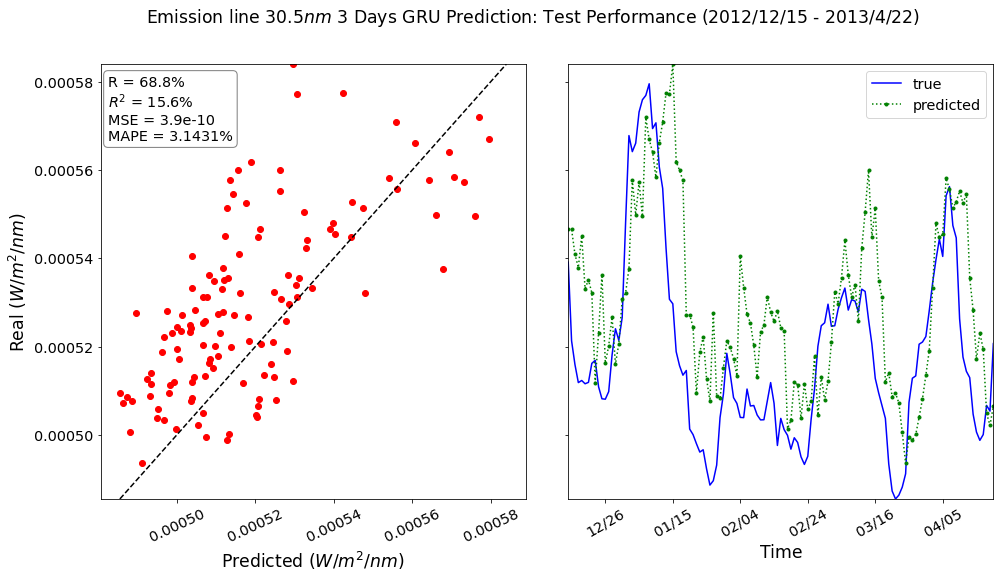

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])
ma = np.max([yTestP.max(),yTest.max()])

yAxis = [mi,ma]

plt.suptitle(r"Emission line $30.5nm$ "+timeTerm+" "+net.upper()+" Prediction: Test Performance (2012/12/15 - 2013/4/22)", fontsize='xx-large')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=5, fontsize='xx-large')
ax1.set_ylabel('Real ($W/m^2/nm$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25, labelsize='x-large')
ax1.tick_params(axis='y', labelsize='x-large')

props = dict(boxstyle='round', facecolor='None', alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(0.0175, 0.975, textstr, transform=ax1.transAxes, fontsize='x-large',
        verticalalignment='top', bbox=props)


ax2.plot(datesT,yTest,'b-',label='true')
ax2.plot(datesT,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlim([datesT[0],datesT[-1]])
ax2.set_xlabel('Time', labelpad=5, fontsize='xx-large')
ax2.tick_params(axis='x', rotation=30, labelsize='x-large')
ax2.legend(fontsize='x-large')

fig.savefig('./Figures/SSI Predictions/30.5'+net.upper()+'_Test'+testSet+'_'+timeTerm+'.pdf', dpi=200, format='pdf', pad_inches=0.1)

Ploting and comparing the 50 first true and predicted values:

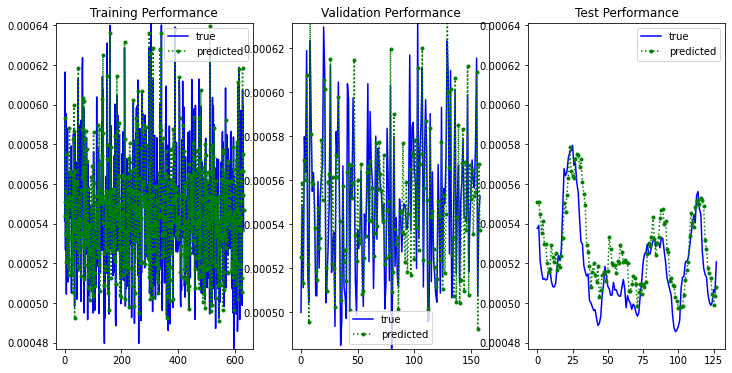

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
#plt.figure()
ax1.plot(yTrain,'b-',label='true')
ax1.plot(yTrainP,'g.:',label='predicted')
ax1.set_ylim((yTrain.min(),yTrain.max()))
ax1.set_title('Training Performance')
ax1.legend()

#plt.figure()
ax2.plot(yVal,'b-',label='true')
ax2.plot(yValP,'g.:',label='predicted')
ax2.set_ylim((yVal.min(),yVal.max()))
ax2.set_title('Validation Performance')
ax2.legend()

ax3.plot(yTest,'b-',label='true')
ax3.plot(yTestP,'g.:',label='predicted')
ax3.set_ylim((yTrain.min(),yTrain.max()))
ax3.set_title('Test Performance')
ax3.legend()

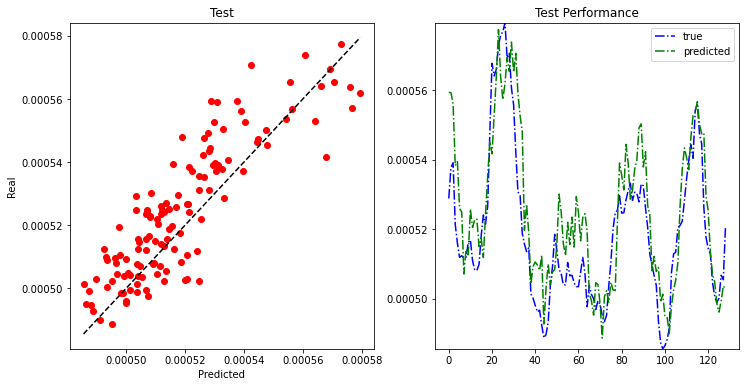

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

mi = np.min([yTestP.min(),yTest.min()])
ma = np.max([yTestP.max(),yTest.max()])

yAxis = [mi,ma]

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Real')
ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')

ax2.plot(yTest,'b-.',label='true')
ax2.plot(yTestP,'g-.',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_title('Test Performance')
ax2.legend()

In [45]:
from matplotlib import dates

data3 = []
for i in Time3:
    data3.append(str(date.fromordinal(int(i))))

dates3 = dates.date2num(data3)

hfmt = dates.DateFormatter('%m/%d')

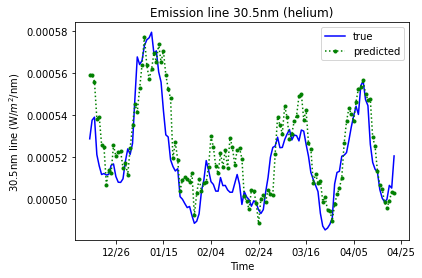

In [48]:
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.plot(dates3,yTest,'b-',label='true')
plt.plot(dates3,yTestP,'g.:',label='predicted')
#ax3.set_ylim((yTrain.min(),yTrain.max()))
plt.title(r'Emission line 30.5nm (helium)')
plt.xlabel('Time')
plt.ylabel(r'30.5nm line (W/$m^2$/nm)')
plt.legend()

1
[0.05]


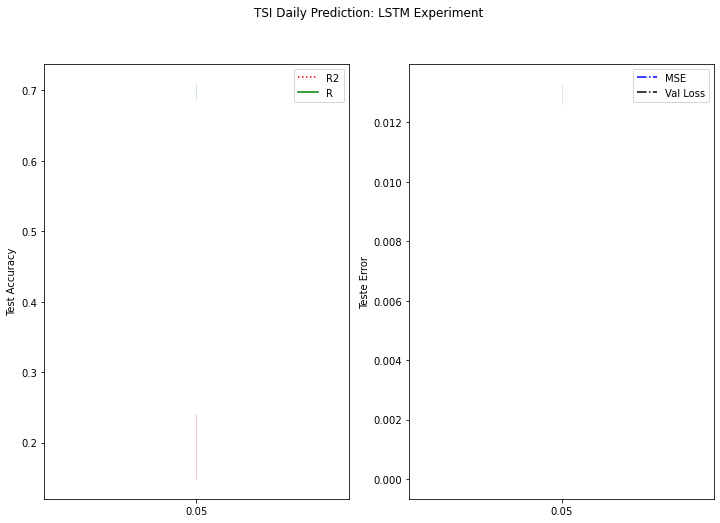

In [48]:
df1 = np.asarray(lstm)
error = np.asarray(error)

n_tests = testsqtd #number of tests for each setting
n_groups = int(df1.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
#groups = np.unique(df1[:, 0]).astype(np.int32) # Each group label
groups = batchRates
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
print(n_groups)
print(groups)

R2MeansStds = [] # R2
RMeansStds = [] # R
MSEMeansStds = [] # MSE
ValLossMeansStds = [] # Validation Loss

for i in range(n_groups):
    R2MeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 1]), np.std(df1[intervals[i]:intervals[i]+n_tests, 1])])
    RMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 2]), np.std(df1[intervals[i]:intervals[i]+n_tests, 2])])
    MSEMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 3]), np.std(df1[intervals[i]:intervals[i]+n_tests, 3])])
    ValLossMeansStds.append([np.mean(error[intervals[i]:intervals[i]+n_tests, 1]), np.std(error[intervals[i]:intervals[i]+n_tests, 1])])

R2MeansStds = np.asarray(R2MeansStds)
RMeansStds = np.asarray(RMeansStds)
MSEMeansStds = np.asarray(MSEMeansStds)
ValLossMeansStds = np.asarray(ValLossMeansStds)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

plt.suptitle('TSI Daily Prediction: LSTM Experiment')

ax1.plot(groups, R2MeansStds[:,0], c=colors[0], label='R2', linestyle=':')
ax1.fill_between(groups, R2MeansStds[:,0] - R2MeansStds[:,1], R2MeansStds[:,0] + R2MeansStds[:,1], color='#880000', alpha=0.2)

ax1.plot(groups, RMeansStds[:,0], c=colors[1], label='R', linestyle='-')
ax1.fill_between(groups, RMeansStds[:,0] - RMeansStds[:,1], RMeansStds[:,0] + RMeansStds[:,1], color='#008800', alpha=0.2)

ax2.plot(groups, MSEMeansStds[:,0], c=colors[2], label='MSE', linestyle='-.')
ax2.fill_between(groups, MSEMeansStds[:,0] - MSEMeansStds[:,1], MSEMeansStds[:,0] + MSEMeansStds[:,1], color='#000088', alpha=0.2)

ax2.plot(groups, ValLossMeansStds[:,0], c=colors[3], label='Val Loss', linestyle='-.')
ax2.fill_between(groups, ValLossMeansStds[:,0] - ValLossMeansStds[:,1], ValLossMeansStds[:,0] + ValLossMeansStds[:,1], color='#888888', alpha=0.2)

ax1.legend()
ax2.legend()

ax1.set_xticks(groups) # repositioning labels batchsize
ax2.set_xticks(groups)
ax1.set_ylabel('Test Accuracy')
ax2.set_ylabel('Teste Error')
plt.show()